<Axes: xlabel='Date'>

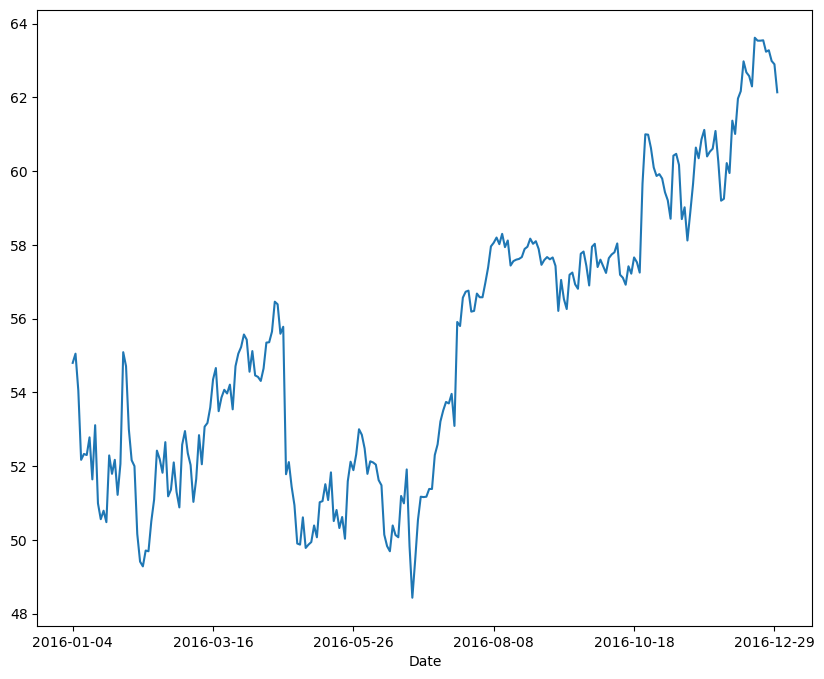

In [524]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#data = pd.DataFrame({'City':['Toronto','Vancouver','Montreal']})
##data['City'].unique()

#dum =pd.get_dummies(data)
#dum
#data.shape
#dum.sort_values(by='City_Toronto')

fb = pd.read_csv('data/facebook.csv',index_col=None)
ms = pd.read_csv('data/microsoft.csv',index_col='Date')
#ser = pd.Series(fb['Volume'].unique()).count()
fb.head(30)
#fb.columns[-1]

#fb.iloc[0:200,0:3].plot()
#fb['Close'].plot()

plt.figure(figsize=(10, 8))
# plot only the Close price of 2016 of Microsoft, 1 line 
ms['Close'].loc['2016-01-01':'2016-12-31'].plot()

In [525]:
ms['diff'] = (ms['Open'] - ms['Close'])

In [526]:
ms['dd_close_diff'] = ms['Close'] - ms['Close'].shift(-1)
ms['Profit'] = ms['dd_close_diff']/ms['Close'].shift(-1)
ms.tail()


,Open,High,Low,Close,Adj Close,Volume,diff,dd_close_diff,Profit
Date,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-2.270004,-0.023892
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,0.750000,0.007957
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,2.480003,0.027021
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,1.860000,3.779999,0.042955
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,2.559998,NaN,NaN


In [527]:
ms['Direction'] = [1 if profit > 0 else -1 for profit in ms['Profit']] ## ms.Select(p => p.Profit > 0 ? 1 : -1);
ms

,Open,High,Low,Close,Adj Close,Volume,diff,dd_close_diff,Profit,Direction
Date,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.279999,-0.309997,-0.006630,-1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.099998,0.429996,0.009281,1
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,0.039997,0.680000,0.014896,1
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.729999,-0.579998,-0.012546,-1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,-0.250000,-1.360000,-0.028577,-1
...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-2.270004,-0.023892,-1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,0.750000,0.007957,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,2.480003,0.027021,1


In [528]:
ms['Rolling_Avrg'] = ms['Close'].rolling(30).mean()
ms

,Open,High,Low,Close,Adj Close,Volume,diff,dd_close_diff,Profit,Direction,Rolling_Avrg
Date,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.279999,-0.309997,-0.006630,-1,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.099998,0.429996,0.009281,1,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,0.039997,0.680000,0.014896,1,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.729999,-0.579998,-0.012546,-1,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,-0.250000,-1.360000,-0.028577,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-2.270004,-0.023892,-1,88.484333
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,0.750000,0.007957,1,88.756333
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,2.480003,0.027021,1,89.019000


<Axes: xlabel='Date'>

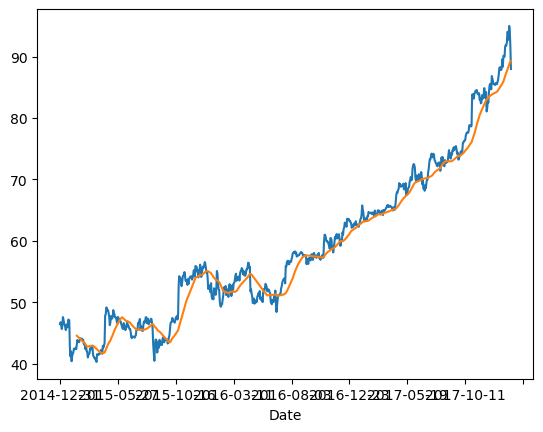

In [529]:
ms['Close'].plot()
ms['Rolling_Avrg'].plot()

In [530]:
ms['MA20'] = ms['Close'].rolling(20).mean()
ms['MA60'] = ms['Close'].rolling(60).mean()
ms['IsLong'] = [1 if fast_signal > slow_signal else 0 for fast_signal, slow_signal in zip(ms['MA20'], ms['MA60'])] 
ms


,Open,High,Low,Close,Adj Close,Volume,diff,dd_close_diff,Profit,Direction,Rolling_Avrg,MA20,MA60,IsLong
Date,,,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.279999,-0.309997,-0.006630,-1,NaN,NaN,NaN,0
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.099998,0.429996,0.009281,1,NaN,NaN,NaN,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,0.039997,0.680000,0.014896,1,NaN,NaN,NaN,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.729999,-0.579998,-0.012546,-1,NaN,NaN,NaN,0
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,-0.250000,-1.360000,-0.028577,-1,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.560005,-2.270004,-0.023892,-1,88.484333,89.8285,86.110500,1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-1.260002,0.750000,0.007957,1,88.756333,90.2815,86.293167,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,0.529999,2.480003,0.027021,1,89.019000,90.6770,86.461833,1


<Axes: xlabel='Date'>

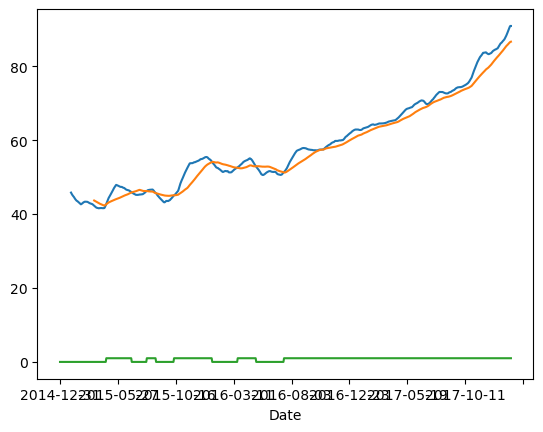

In [531]:
ms['MA20'].plot()
ms['MA60'].plot()
ms['IsLong'].plot()

Receive 257
Lost 284


Date
2014-12-31     0.000000
2015-01-02     0.000000
2015-01-05     0.000000
2015-01-06     0.000000
2015-01-07     0.000000
                ...    
2018-01-30   -33.600005
2018-01-31   -32.850005
2018-02-01   -30.370002
2018-02-02   -26.590003
2018-02-05          NaN
Name: Profit, Length: 780, dtype: float64

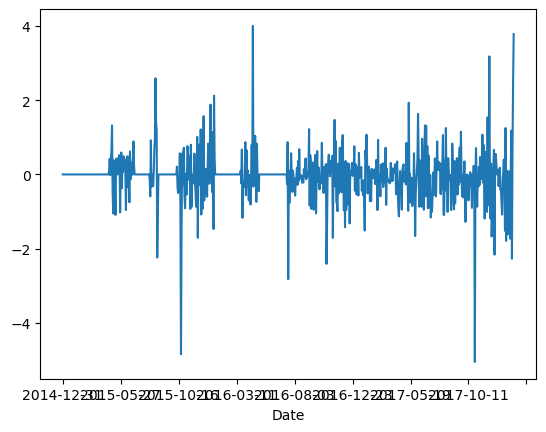

In [532]:
ms['Profit'] = [ dd_c_diff if isLong == 1 else 0 for (dd_c_diff, isLong) in zip(ms['dd_close_diff'], ms['IsLong']) ]
ms['Profit'].plot()
print("Receive " + str((ms['Profit'] > 0).sum()))
print("Lost " + str((ms['Profit']< 0).sum()))
ms['Profit'].cumsum()

<Axes: xlabel='0'>

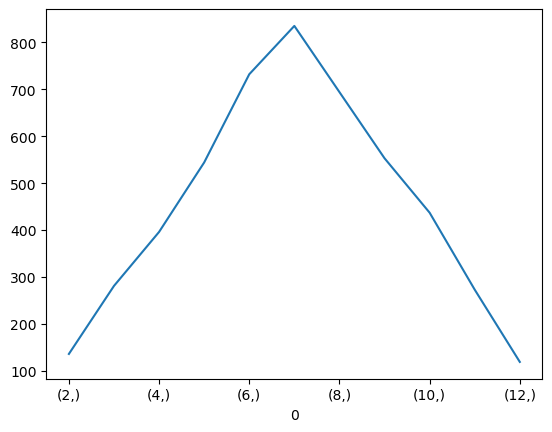

In [533]:
die = pd.DataFrame([1,2,3,4,5,6])
odds = [die.sample(2, replace=True).sum() for _ in range(5000)] 
odds
freq = pd.DataFrame(odds).value_counts().sort_index()
freq.plot()

<Axes: xlabel='0'>

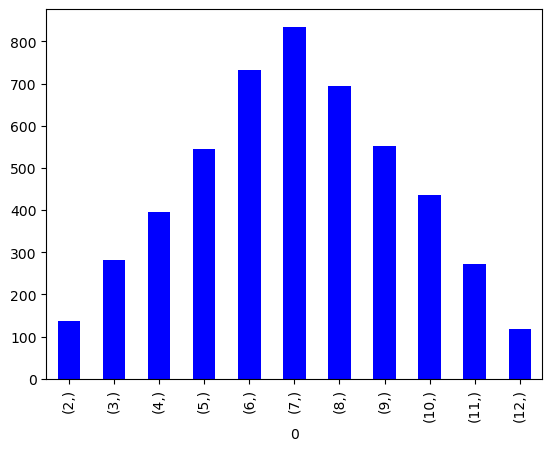

In [534]:
freq.plot(kind="bar", color="blue")

In [535]:
# Valid sums and probabilities for two dice
sums = range(2, 13)
probabilities = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]  # Frequencies of sums
probabilities = [p / 36 for p in probabilities]  # Normalize probabilities

X_distri = pd.DataFrame({'Sum': sums, 'Prob': probabilities})
X_distri.set_index('Sum', inplace=True)

mean = (X_distri.index * X_distri['Prob']).sum()
var = (((X_distri.index - mean)**2) * X_distri['Prob']).sum()

mean, var

(6.999999999999998, 5.833333333333333)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2006-10-02  10.728572  10.838572  10.614285  10.694285   7.239566  178159800
2006-10-03  10.635715  10.707143  10.455714  10.582857   7.164135  197677200
2006-10-04  10.585714  10.780000  10.451428  10.768572   7.289855  207270700
2006-10-05  10.647142  10.880000  10.590000  10.690000   7.236666  170970800
2006-10-06  10.631429  10.720000  10.544286  10.602858   7.177672  116739700


<Axes: xlabel='Date'>

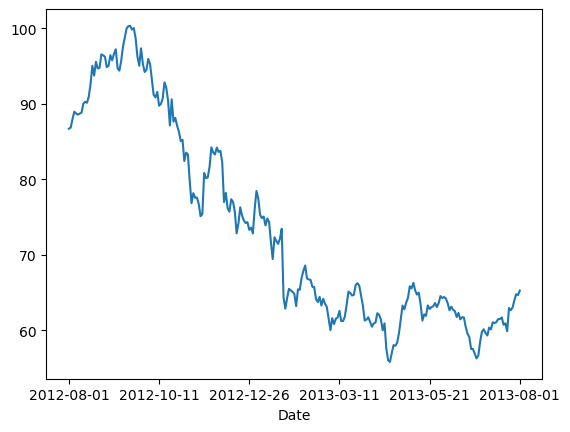

In [536]:
appl = pd.read_csv('data/apple.csv', index_col='Date')
import matplotlib.pyplot as plt
print(appl.head())
appl.loc['2012-08-01':'2013-08-01','Close'].plot()

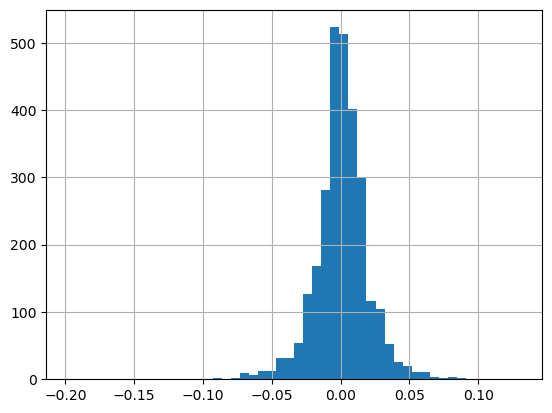

In [537]:
appl['Log_Return'] = np.log(appl['Close']).shift(-1) - np.log(appl['Close'])
bins = appl['Log_Return'].hist(bins=50)
#(appl.loc['2012-08-01':'2013-08-01','Close'].shift(-1)-appl.loc['2012-08-01':'2013-08-01','Close']).hist(bins=50)

In [538]:
from scipy.stats import norm
density = pd.DataFrame()

mu = appl['Log_Return'].mean()
sigma =appl['Log_Return'].std()

density['x'] = np.arange(appl['Log_Return'].min()-0.01, appl['Log_Return'].max()+0.01,0.001)
density['pdf'] = norm.pdf(density['x'],mu,sigma)
density['cdf'] = norm.cdf(density['x'],mu,sigma)

Mean: 0.000975467759150088 Std: 0.020045447615854962


<Axes: >

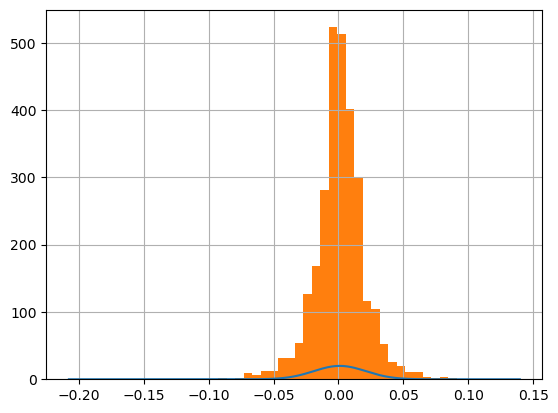

In [539]:
plt.plot(density['x'], density['pdf'])
print("Mean: " + str(mu) + " Std: "+str(sigma))
appl['Log_Return'].hist(bins=50)
#plt.plot(density['x'], density['cdf'])

In [540]:
appl['Log_Return'].quantile(0.05)

-0.029028109888773246

Percentage return = (e**(log return)−1)×100
e**(−0.029028)≈0.9713
Percentage return =(0.9713−1)×100≈−2.87%

This means that, based on historical data:
- 5% of the time (quantile(0.05)), the daily return is -2.87% or lower.
- In the remaining 95% of the cases, the daily return is better than -2.87%

In [541]:
prob_return = norm.cdf(-0.05,mu,sigma)
prob_return

0.005495344250959507

- Quantile (2.87%) is empirical and based on actual data (log returns), telling where the 5th percentile lies in the dataset.

- CDF (0.549%) is theoretical, assuming that the data follows a normal distribution. It tells the probability of a return of -5% or lower, assuming the data fits a normal distribution.

So, the two results differ because one is based on the actual data and the other is based on the theoretical distribution fit to that data.

616.4060606060607

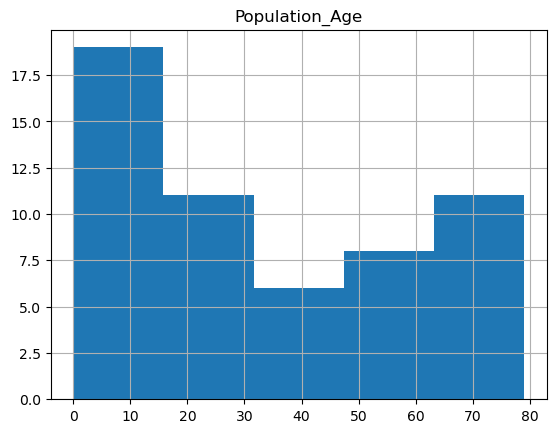

In [542]:
import pandas as pd
#del data
data = pd.DataFrame()
age = pd.Series(range(0,80,1))
data['Population_Age'] = pd.DataFrame(age.sample(55,replace=True))
data.hist(bins=5)
data['Population_Age'].var()

In [543]:
np.random.seed(2)
resampling_collection = [age.sample(30,replace=True).reset_index(drop=True) for _ in range(0,500,1)]
collection = pd.DataFrame(resampling_collection)
collection.shape


#Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))

(500, 30)

527.0624390804597


540.0

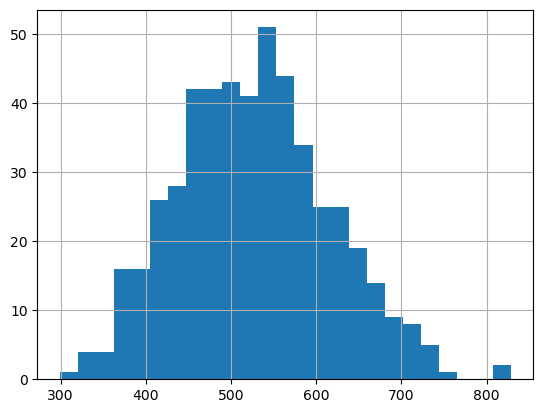

In [544]:
collection.T.var().hist(bins=25)
print(collection.T.var().mean())
age.var()


In [546]:
data2 = np.random.normal(10,1,size=300)
ls1 = [pd.Series(data2).sample(10,replace=True).reset_index(drop=True) for _ in range(1000)]
df1 = pd.DataFrame(ls1)#.T.mean()#.describe()
#df1['if_greater'] = [1 if _ > 10 else 0 for _ in df1.iloc[:, 1]]
#df1['if_greater'] = [1 if _ > 10 else 0 for _ in df1.mean()]

df1['if_greater'] = df1.apply(lambda row: 1 if row.mean() > 10 else 0, axis=1)
df1['if_greater'].value_counts()
df1

,0,1,2,3,4,5,6,7,8,9,if_greater
0,10.000771,8.591448,11.629801,10.013229,10.072577,9.725265,10.571613,9.393227,10.529031,10.453684,1
1,9.485237,11.896439,9.771440,9.100551,10.091573,9.575618,8.090936,10.259294,10.098062,8.695016,0
2,12.234558,11.746829,10.857546,8.161223,11.561167,10.280652,10.000771,9.982639,8.384507,11.750793,1
3,10.930461,8.922550,9.256516,9.332267,12.172257,11.749729,9.557109,8.927175,10.450273,10.936669,1
4,10.403934,10.257998,9.378589,11.459468,10.065213,9.823796,10.381677,8.452562,9.526547,10.065213,0
...,...,...,...,...,...,...,...,...,...,...,...
995,8.469751,10.065213,9.303806,10.930461,10.450273,7.980861,11.024886,9.744828,10.615963,11.012586,0
996,9.293908,10.257998,10.979503,11.131771,8.594223,9.679094,10.594000,12.014275,9.679094,8.955335,1
997,12.014275,10.497986,11.024886,10.936669,9.419822,10.885260,10.227917,9.677435,10.525354,10.381677,1
998,9.784453,11.413717,10.145865,10.512672,9.557109,9.649079,9.315772,11.774907,10.411834,9.267412,1


<Axes: >

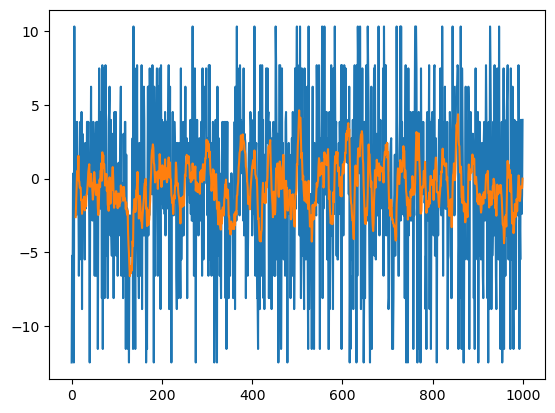

In [554]:
data3 = np.random.normal(1,5,size=30)
ls2 = [pd.Series(data3).sample(10, replace=True).reset_index(drop=True) for _ in range(1000)]
df3 = pd.DataFrame(ls2)
df3['ifLess'] = df3.apply(lambda _: 1 if _[0] + _[1] < 5 else 0, axis=1) 
df3

df3['ifGreater'] = [ ___ if __ > 5 and _< 5 else 0 for (___, __, _) in zip(df3[3], df3[2], df3[1]) ]
df3[5].plot()
df3[5].rolling(10).mean().plot()
